# TBX5 - upbm pipeline QC

In [1]:
library(tidyverse)
library(cowplot)
library(ggrepel)
library(readxl)
library(upbm)
library(upbmAux)
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuan

In [2]:
source("../../../pbm_utils.r")

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: RSQLite

Loading required package: parallel

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern



Attaching package: ‘seqinr’


The following object is masked from ‘package:seqLogo’:

    consensus


The following object is masked from ‘package:Biostrings’:

    translate


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:dplyr’:

    count




## variables

In [3]:
tf <- "TBX5"

motif <- "AGGTGT"
rc_motif <- "ACACCT"

ref_condition <- "TBX5C05-REF"

datdir <- "../../../../data/internal/pbms/gpr_files"
sampdir <- "../../../../data/internal/pbms/samp_sheets"

## 1. load sample sheet

In [4]:
alexa_samples <- read_csv(file.path(sampdir, paste0(tf, "-alexa.csv")), col_types = cols())
alexa_samples

New names:
• `` -> `...1`


...1 date   id  reuse type  pmt lp  idx condition  
1   1   220812 420 1     Alexa 500 100 3   TBX5C05-REF
2   2   220812 420 1     Alexa 600 100 3   TBX5C05-REF
3   3   220812 420 1     Alexa 700 100 3   TBX5C05-REF
4   5   220817 432 1     Alexa 400 100 3   TBX5C05-REF
5   6   220817 432 1     Alexa 500 100 3   TBX5C05-REF
6   7   220817 432 1     Alexa 600 100 3   TBX5C05-REF
7   8   220817 432 1     Alexa 700 100 3   TBX5C05-REF
8   9   221026 425 1     Alexa 400 100 4   TBX5C05-REF
9  10   221026 425 1     Alexa 500 100 4   TBX5C05-REF
10 11   221026 425 1     Alexa 600 100 4   TBX5C05-REF
11 12   221026 425 1     Alexa 400 100 5   TBX5A05    
12 13   221026 425 1     Alexa 500 100 5   TBX5A05    
13 14   221026 425 1     Alexa 600 100 5   TBX5A05    
14 15   221026 425 1     Alexa 400 100 7   TBX5B05    
15 16   221026 425 1     Alexa 500 100 7   TBX5B05    
16 17   221026 425 1     Alexa 600 100 7   TBX5B05    
17 18   230511 459 1     Alexa 400 100 3   TBX5C05-REF
18 19   230511 459 1     Alexa 500 100 3   TBX5C05-REF
19 20   230511 459 1     Alexa 600 100 3   TBX5C05-REF
20 21   230511 459 1     Alexa 400 100 5   TBX5B05    
21 22   230511 459 1     Alexa 500 100 5   TBX5B05    
22 23   230511 459 1     Alexa 600 100 5   TBX5B05    
23 24   230511 459 1     Alexa 400 100 7   TBX5A05    
24 25   230511 459 1     Alexa 500 100 7   TBX5A05    
25 26   230511 459 1     Alexa 600 100 7   TBX5A05    
   gpr                                                                                                                                   
1  220812_v14_420_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_KLF1_Alexa488_lp500pg100_3-8.gpr         
2  220812_v14_420_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_KLF1_Alexa488_lp600pg100_3-8.gpr         
3  220812_v14_420_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_KLF1_Alexa488_lp700pg100_3-8.gpr         
4  220817_v14_432_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_HMBOX1B06_Alexa488_lp400pg100_3-8.gpr    
5  220817_v14_432_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_HMBOX1B06_Alexa488_lp500pg100_3-8.gpr    
6  220817_v14_432_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_HMBOX1B06_Alexa488_lp600pg100_3-8.gpr    
7  220817_v14_432_1_RORCA02-REF_HMBOX1C06-REF_TBX5C05-REF_OTX2F11-REF_RORCH01_HMBOX1A06_RORCC02_HMBOX1B06_Alexa488_lp700pg100_3-8.gpr    
8  221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp400pg100_4-8.gpr    
9  221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp500pg100_4-8.gpr    
10 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp600pg100_4-8.gpr    
11 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp400pg100_5-8.gpr    
12 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp500pg100_5-8.gpr    
13 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp600pg100_5-8.gpr    
14 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp400pg100_7-8.gpr    
15 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp500pg100_7-8.gpr    
16 221026_v14_425_1_FOXA1-REF_OTX2F11-REF_DLX4B02-REF_TBX5C05-REF_TBX5A05_PKNOX1F12-REF_TBX5B05_PKNOX1E12_Alexa488_lp600pg100_7-8.gpr    
17 230511_v14_459_1_LHX9C10-Ref_CREB1-100866_TBX5C05-Ref_LHX9-101201_TBX5B05_LHX9-100401_TBX5A05_CREB1-100217_Alexa488_lp400pg100_3-8.gpr
18 230511_v14_459_1_LHX9C10-Ref_CREB1-100866_TBX5C05-Ref_LHX9-101201_TBX5B05_LHX9-100401_

In [5]:
cy3_samples <- read_csv(file.path(sampdir, paste0(tf, "-cy3.csv")), col_types = cols())
cy3_samples

New names:
• `` -> `...1`


...1 date   id  type pmt lp  idx
1 1    220811 420 Cy3  500 100 3  
2 2    220817 432 Cy3  500 100 3  
3 3    221025 425 Cy3  500 100 4  
4 4    221025 425 Cy3  500 100 5  
5 5    221025 425 Cy3  500 100 7  
6 6    230510 459 Cy3  500 100 3  
7 7    230510 459 Cy3  500 100 5  
8 8    230510 459 Cy3  500 100 7  
  gpr                                                  id_idx
1 220811_v14_420_doublestranded_Cy3_lp500pg100_3-8.gpr 420_3 
2 220817_v14_432_doublestranded_Cy3_lp500pg100_3-8.gpr 432_3 
3 221025_v14_425_doublestranded_Cy3_lp500pg100_4-8.gpr 425_4 
4 221025_v14_425_doublestranded_Cy3_lp500pg100_5-8.gpr 425_5 
5 221025_v14_425_doublestranded_Cy3_lp500pg100_7-8.gpr 425_7 
6 230510_v14_459_doublestranded_Cy3_lp500pg100_3-8.gpr 459_3 
7 230510_v14_459_doublestranded_Cy3_lp500pg100_5-8.gpr 459_5 
8 230510_v14_459_doublestranded_Cy3_lp500pg100_7-8.gpr 459_7

In [6]:
# properly prefix file paths for data
alexa_samples <- dplyr::mutate(alexa_samples, gpr = file.path(datdir, gpr))
cy3_samples <- dplyr::mutate(cy3_samples, gpr = file.path(datdir, gpr))

## 2. load data

In [7]:
tf_a <- gpr2PBMExperiment(alexa_samples, probes = pbm_8x60k_v1)
tf_c <- gpr2PBMExperiment(cy3_samples, probes = pbm_8x60k_v1)

## 3. QC: # saturated probes at each PMT gain

In [8]:
tf_a_df <- broom::tidy(tf_a, long = TRUE) 
tf_c_df <- broom::tidy(tf_c, long = TRUE) 

In [9]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nsat = sum(log2(fore) > 15.5 |
                                log2(fore) < 4, na.rm = TRUE)) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nsat) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 8 × 6
     id condition   `400` `500` `600` `700`
  <dbl> <chr>       <int> <int> <int> <int>
1   420 TBX5C05-REF    NA     2   119   466
2   425 TBX5A05         0    21   204    NA
3   425 TBX5B05         0     4   471    NA
4   425 TBX5C05-REF     0    39   395    NA
5   432 TBX5C05-REF     0     0    10   184
6   459 TBX5A05         0     1   112    NA
7   459 TBX5B05         0     0   204    NA
8   459 TBX5C05-REF     0     0   156    NA


In [10]:
chosen_pmt <- 500

### also check number of NA probes

In [11]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nna = sum(is.na(fore))) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nna) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 8 × 6
     id condition   `400` `500` `600` `700`
  <dbl> <chr>       <int> <int> <int> <int>
1   420 TBX5C05-REF    NA     0     0     0
2   425 TBX5A05         0     0     0    NA
3   425 TBX5B05        27    27    27    NA
4   425 TBX5C05-REF     0     0     0    NA
5   432 TBX5C05-REF     0     0     0     0
6   459 TBX5A05       903   903   903    NA
7   459 TBX5B05       168   168     0    NA
8   459 TBX5C05-REF   791   791   791    NA


## 4. QC: distribution of probe intensities at PMT gains

In [12]:
options(repr.plot.width=10, repr.plot.height=8)

Warning message:
“Removed 5499 rows containing non-finite values (stat_density).”


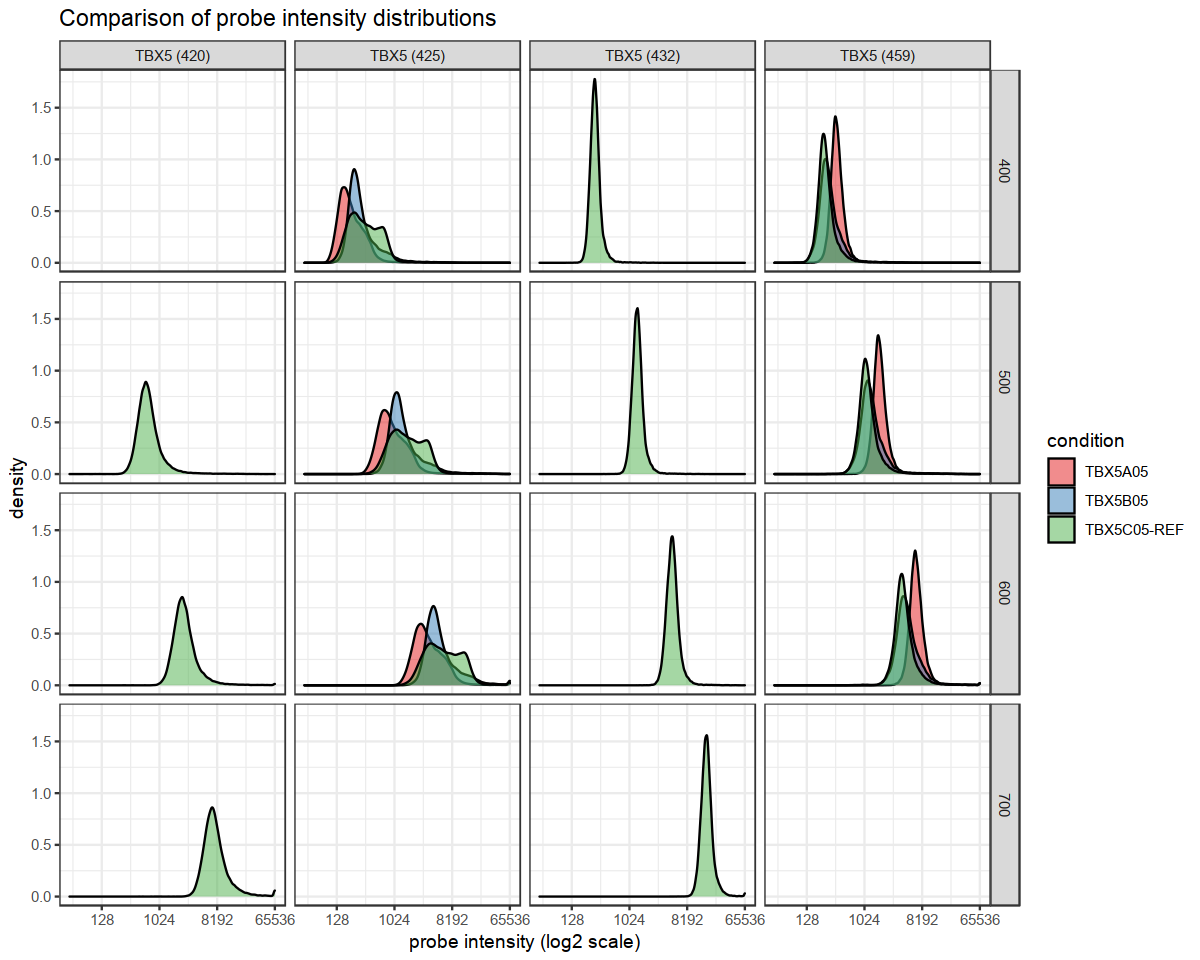

In [13]:
tf_a_df %>%
    dplyr::filter(pmt > 300) %>%
    dplyr::mutate(tf = paste0(tf, " (", id, ")")) %>%
    ggplot(aes(x = fore)) +
    geom_density(aes(fill = condition), alpha = 1/2) +
    facet_grid(pmt ~ tf) +
    scale_fill_brewer(palette = "Set1") + 
    scale_x_continuous("probe intensity (log2 scale)", trans = "log2") +
    ggtitle("Comparison of probe intensity distributions")

## 5. QC: spatial trends of probe intensities at PMT gains

### alexa

In [14]:
options(repr.plot.width=16, repr.plot.height=8)

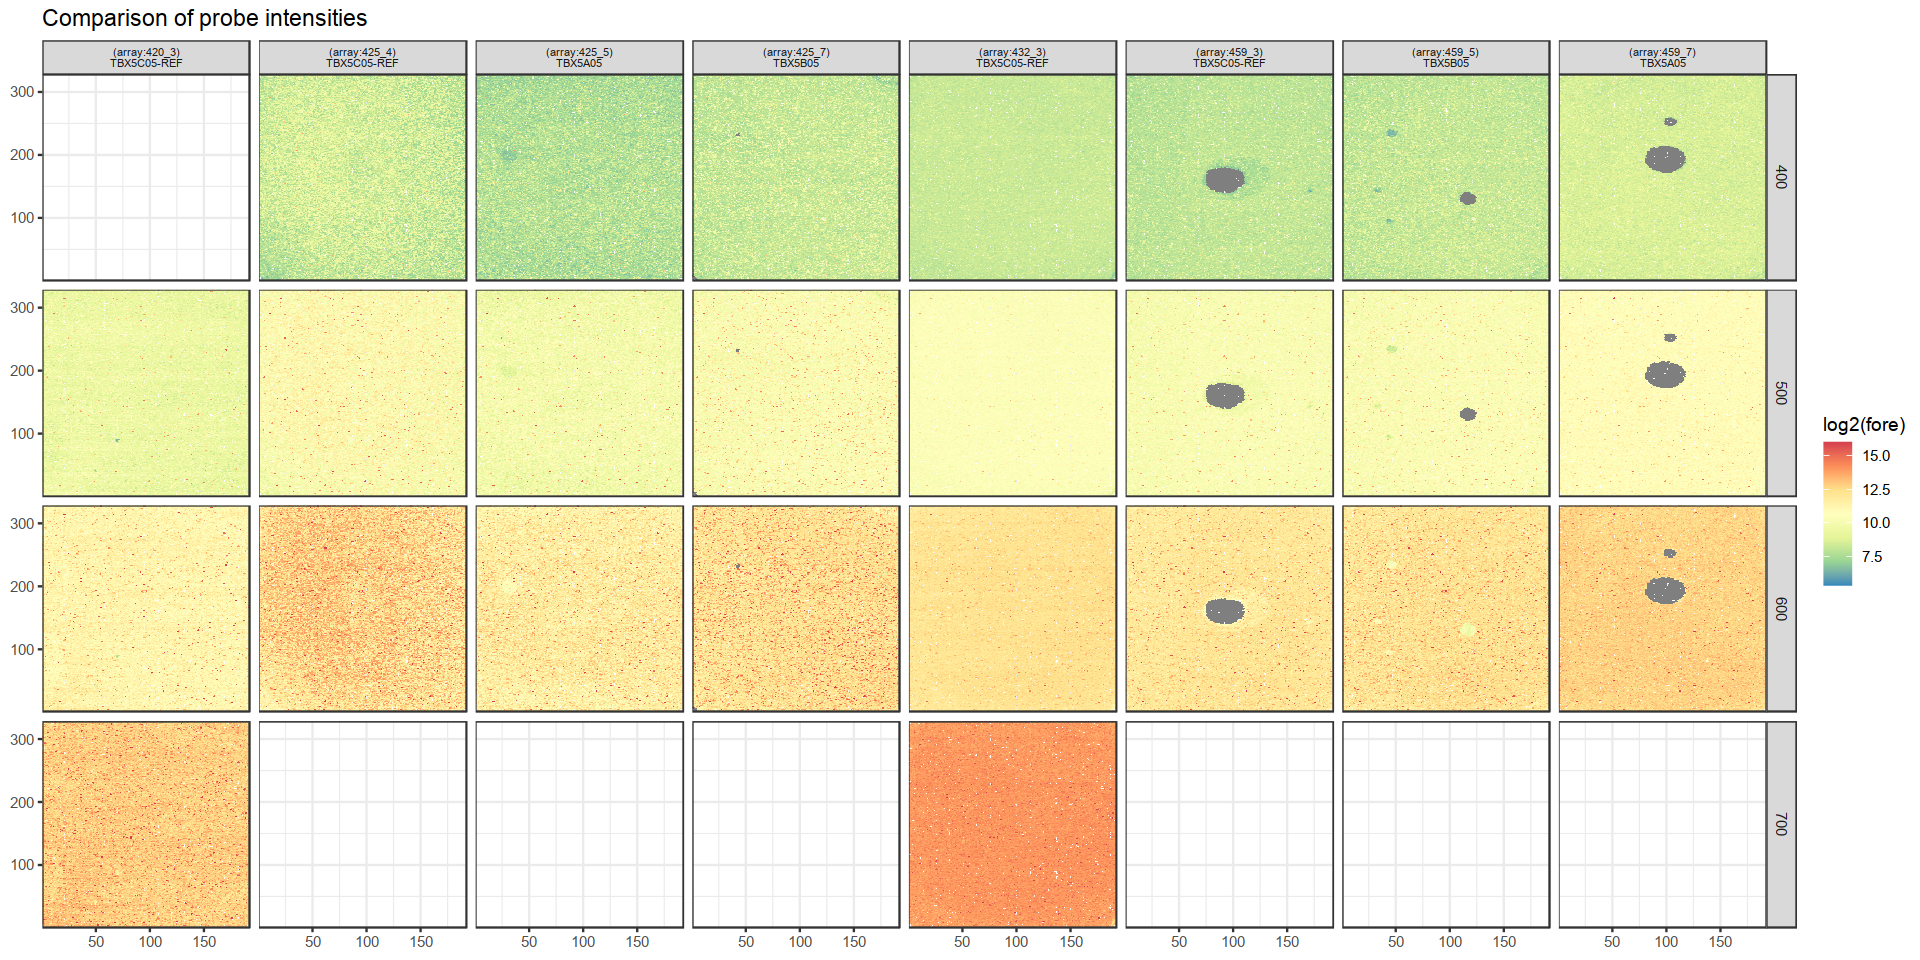

In [15]:
tf_a_df %>%
    dplyr::filter(pmt > 300) %>%
    dplyr::mutate(condition = paste0("(array:", id_idx, ")\n", condition)) %>%
    ggplot(aes(x = Column, y = Row, fill = log2(fore))) +
    geom_tile() +
    scale_fill_distiller(palette = "Spectral") +
    scale_x_continuous(NULL, expand = c(0, 0)) +
    scale_y_continuous(NULL, expand = c(0, 0)) +
    facet_grid(pmt ~ condition) +
    ggtitle("Comparison of probe intensities") +
    theme(strip.text.x = element_text(size = 6))

### cy3

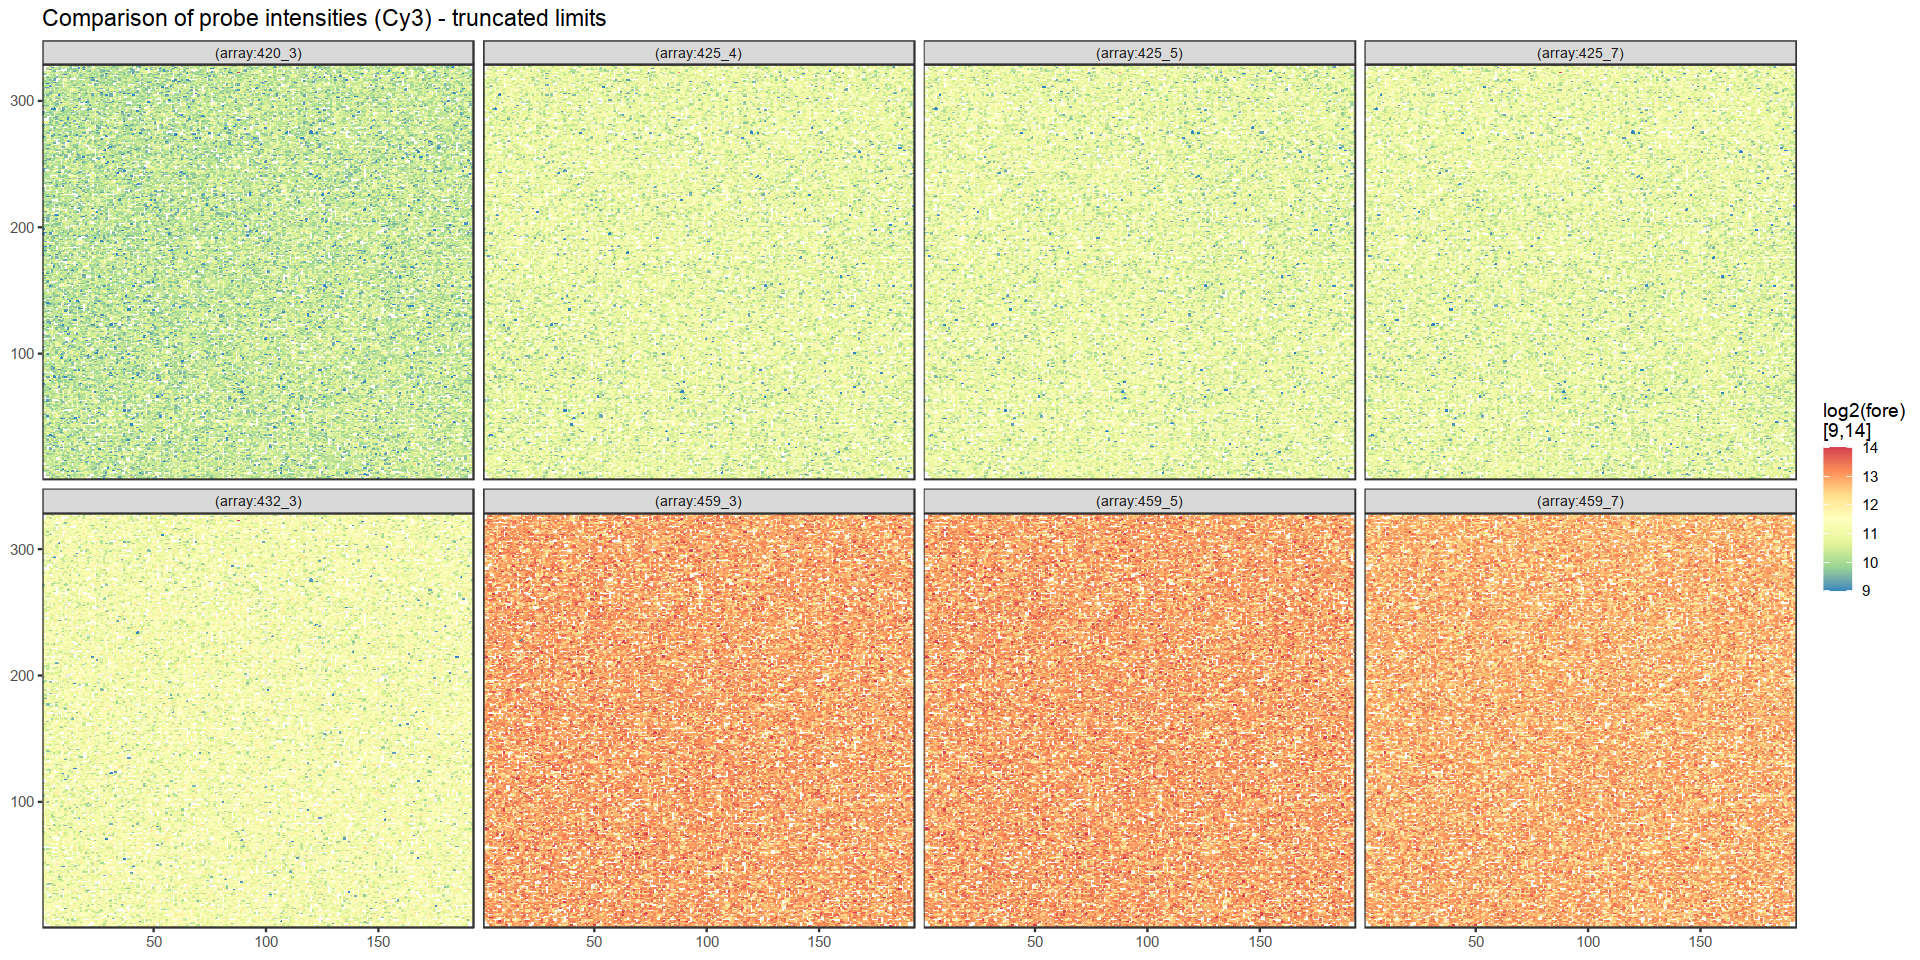

In [16]:
tf_c_df %>%
    dplyr::mutate(fore = scales::squish(fore, range = c(2^9, 2^14))) %>%
    dplyr::mutate(condition = paste0("(array:", id_idx, ")")) %>%
    ggplot(aes(x = Column, y = Row, fill = log2(fore))) +
    geom_tile() +
    scale_fill_distiller("log2(fore)\n[9,14]", palette = "Spectral") +
    scale_x_continuous(NULL, expand = c(0, 0)) +
    scale_y_continuous(NULL, expand = c(0, 0)) +
    facet_wrap(~ condition, nrow = 2) +
    ggtitle("Comparison of probe intensities (Cy3) - truncated limits") +
    theme(strip.text.x = element_text(size = 8))

## 6. QC: comparisons across replicates (probe level)

In [17]:
options(repr.plot.width=8, repr.plot.height=8)

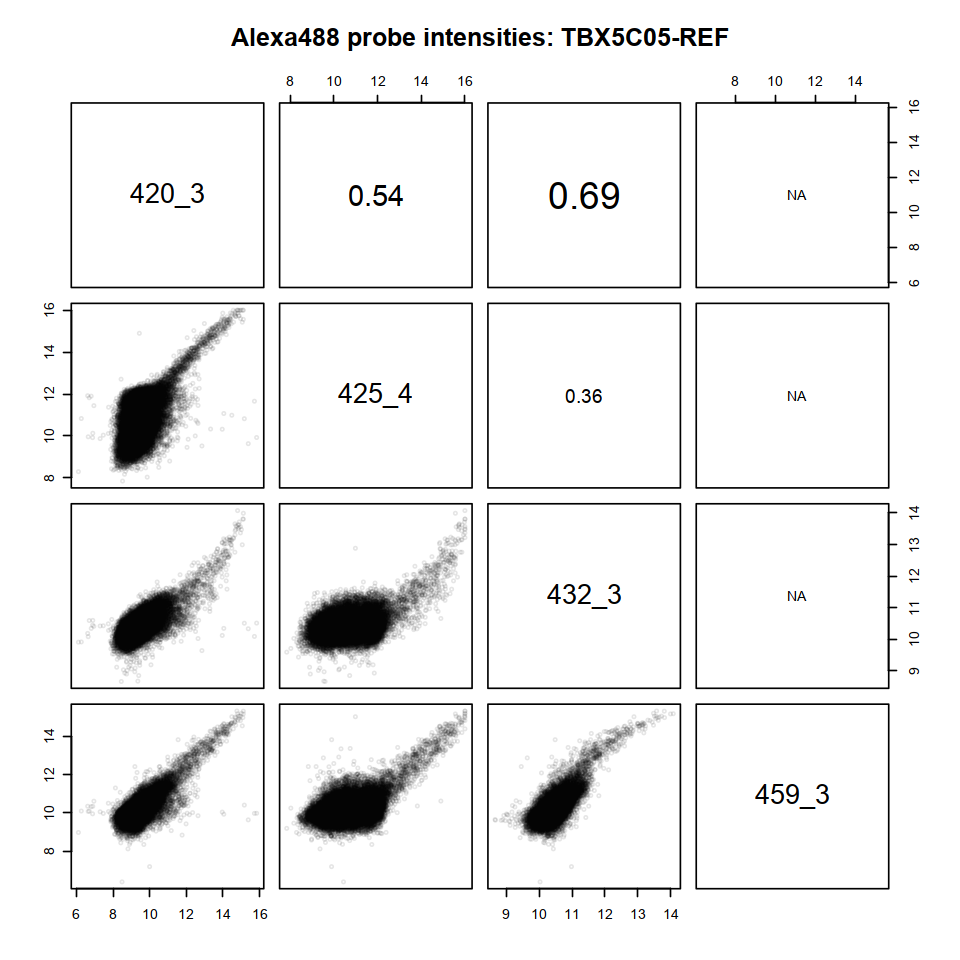

In [19]:
tf_a_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5C05-REF") %>%
    dplyr::select(Column, Row, condition, id_idx, fore) %>%
    dplyr::mutate(fore=log2(fore)) %>%
    tidyr::spread(id_idx, fore) %>%
    dplyr::select(-Column, -Row, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Alexa488 probe intensities: TBX5C05-REF")

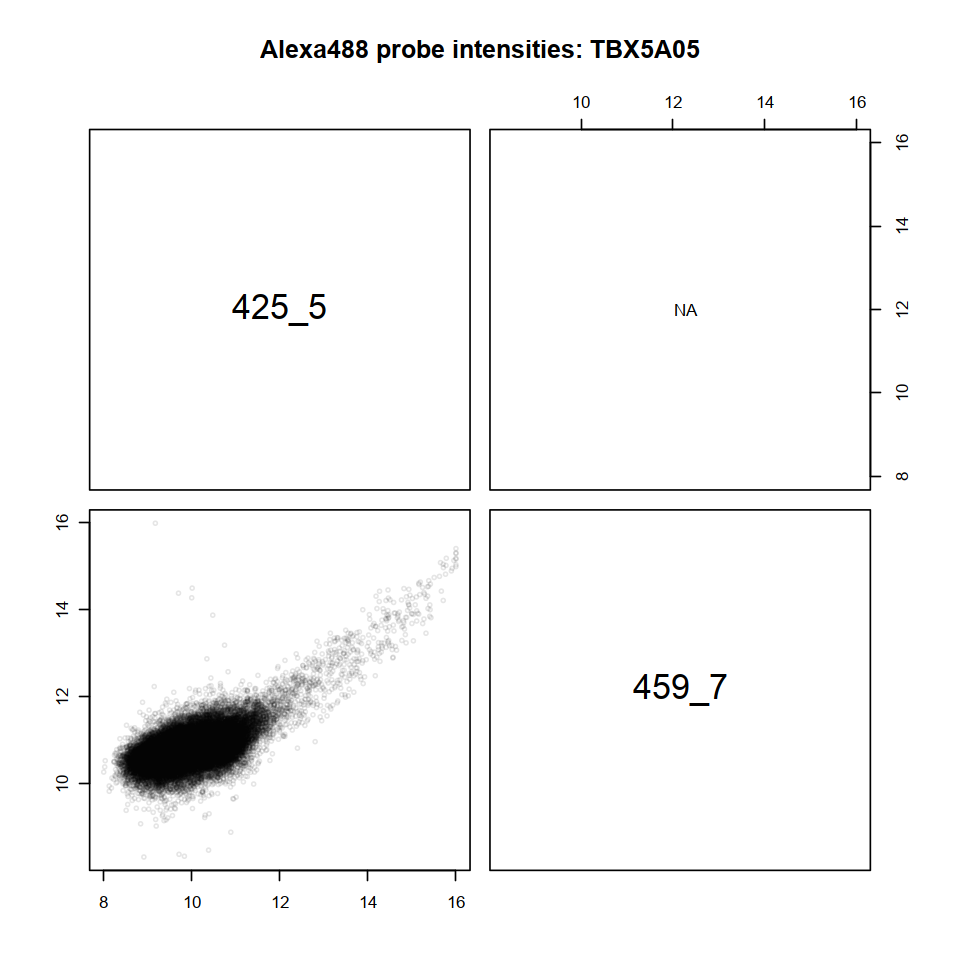

In [20]:
tf_a_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5A05") %>%
    dplyr::select(Column, Row, condition, id_idx, fore) %>%
    dplyr::mutate(fore=log2(fore)) %>%
    tidyr::spread(id_idx, fore) %>%
    dplyr::select(-Column, -Row, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Alexa488 probe intensities: TBX5A05")

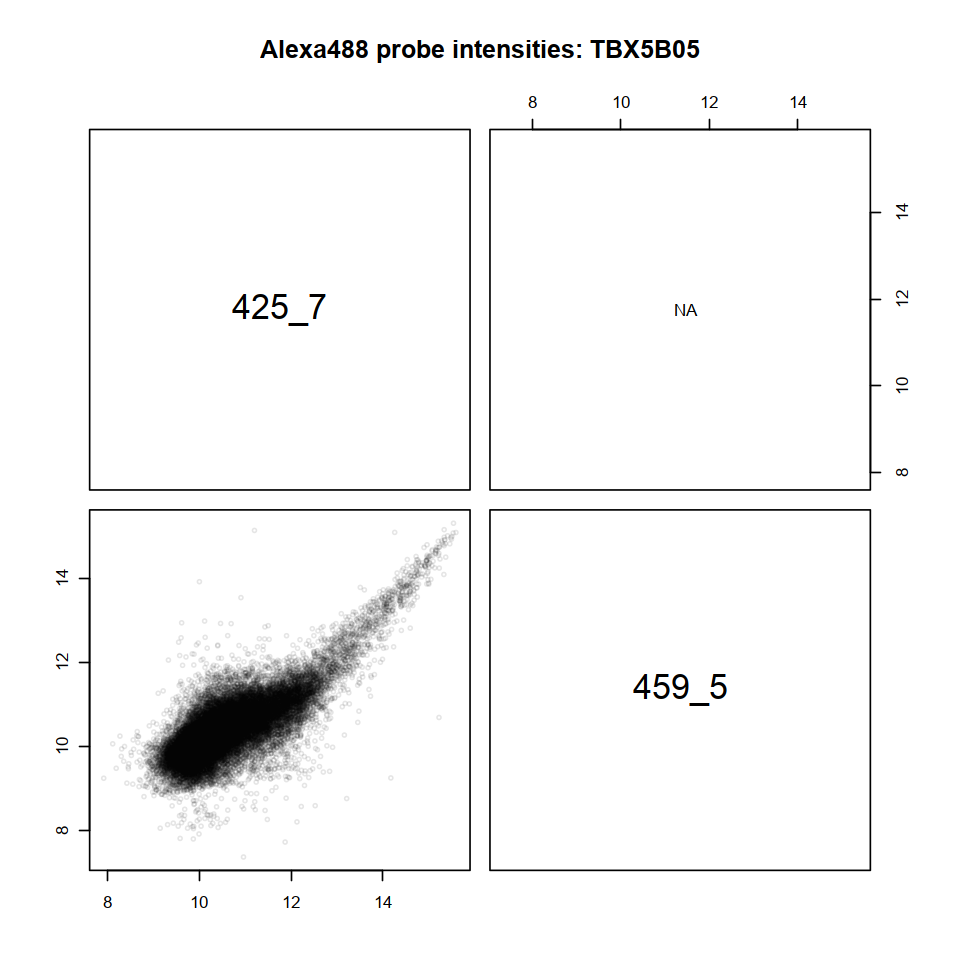

In [21]:
tf_a_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5B05") %>%
    dplyr::select(Column, Row, condition, id_idx, fore) %>%
    dplyr::mutate(fore=log2(fore)) %>%
    tidyr::spread(id_idx, fore) %>%
    dplyr::select(-Column, -Row, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Alexa488 probe intensities: TBX5B05")

## 7. perform preprocessing to run inference (differential affinity)

### select PMT gain / filter out any bad or spillover chambers

In [22]:
tf_a_pmt <- tf_a[, colData(tf_a)$pmt == chosen_pmt]

Warning message:
“Removed 1889 rows containing non-finite values (stat_density).”


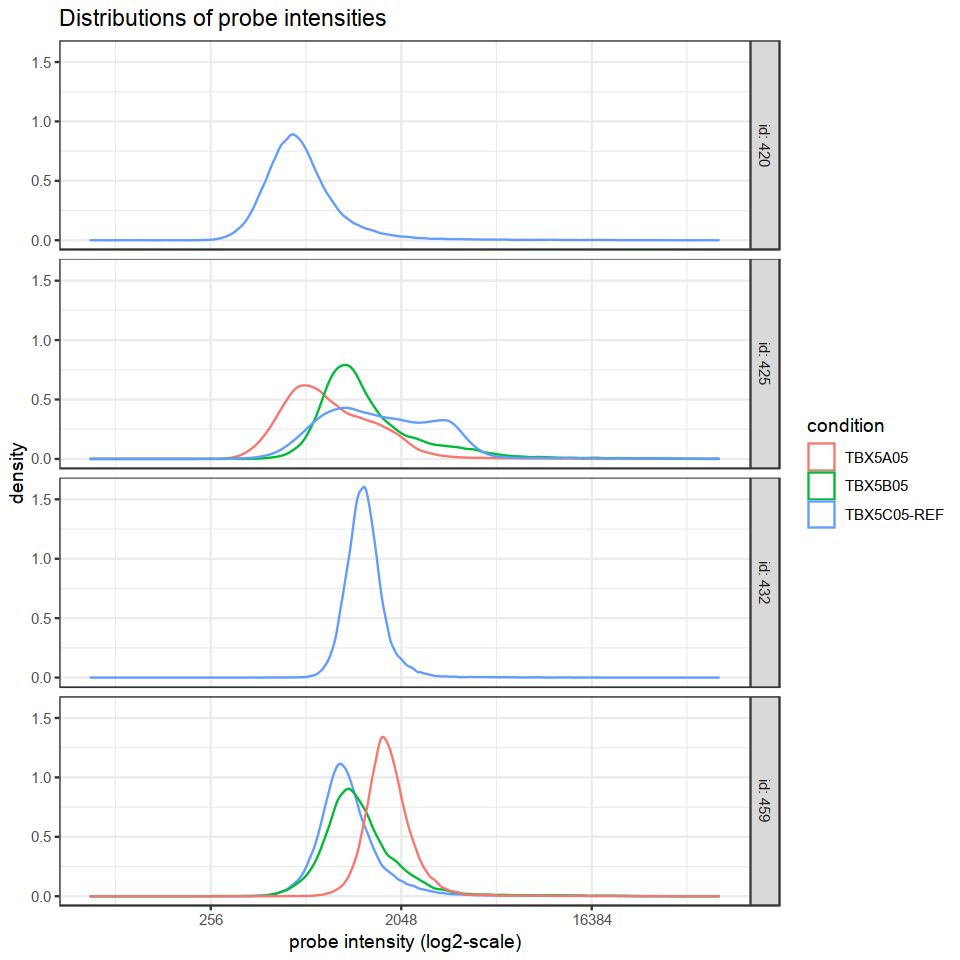

In [23]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("probe intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of probe intensities")

### background-subtract probe intensities

In [24]:
tf_a_pmt <- backgroundSubtract(tf_a_pmt, assay = "fore", assayb = "back")
tf_c <- backgroundSubtract(tf_c, assay = "fore", assayb = "back")

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

Warning message:
“Removed 1935 rows containing non-finite values (stat_density).”


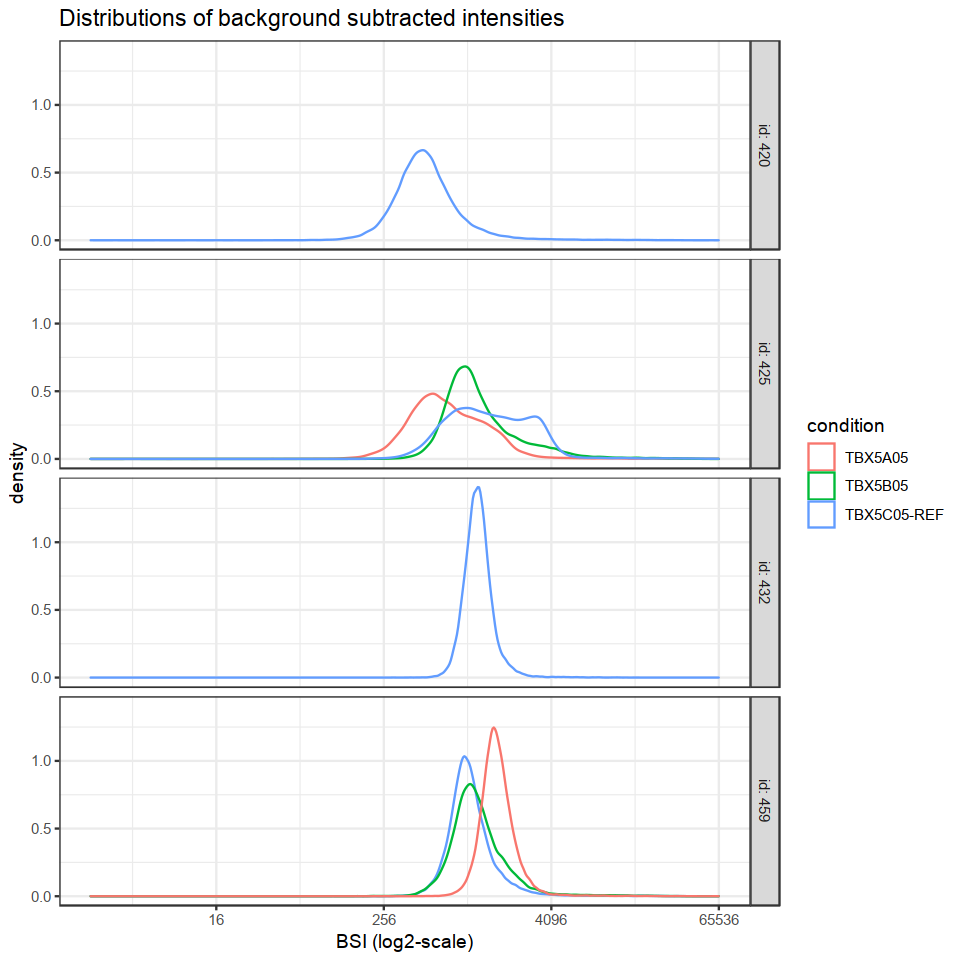

In [25]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("BSI (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of background subtracted intensities")

### cy3 normalize

In [26]:
tf_c_e <- cy3FitEmpirical(tf_c, refcy3_8x60k_v1)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

In [27]:
tf_a_pmt <- cy3Normalize(pe = tf_a_pmt, cy3pe = tf_c_e, match_by = "id_idx")

### spatial adjustment

In [28]:
tf_a_pmt <- spatiallyAdjust(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

### normalize within replicates

In [29]:
tf_a_pmt <- normalizeWithinReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Removed 3440 rows containing non-finite values (stat_density).”


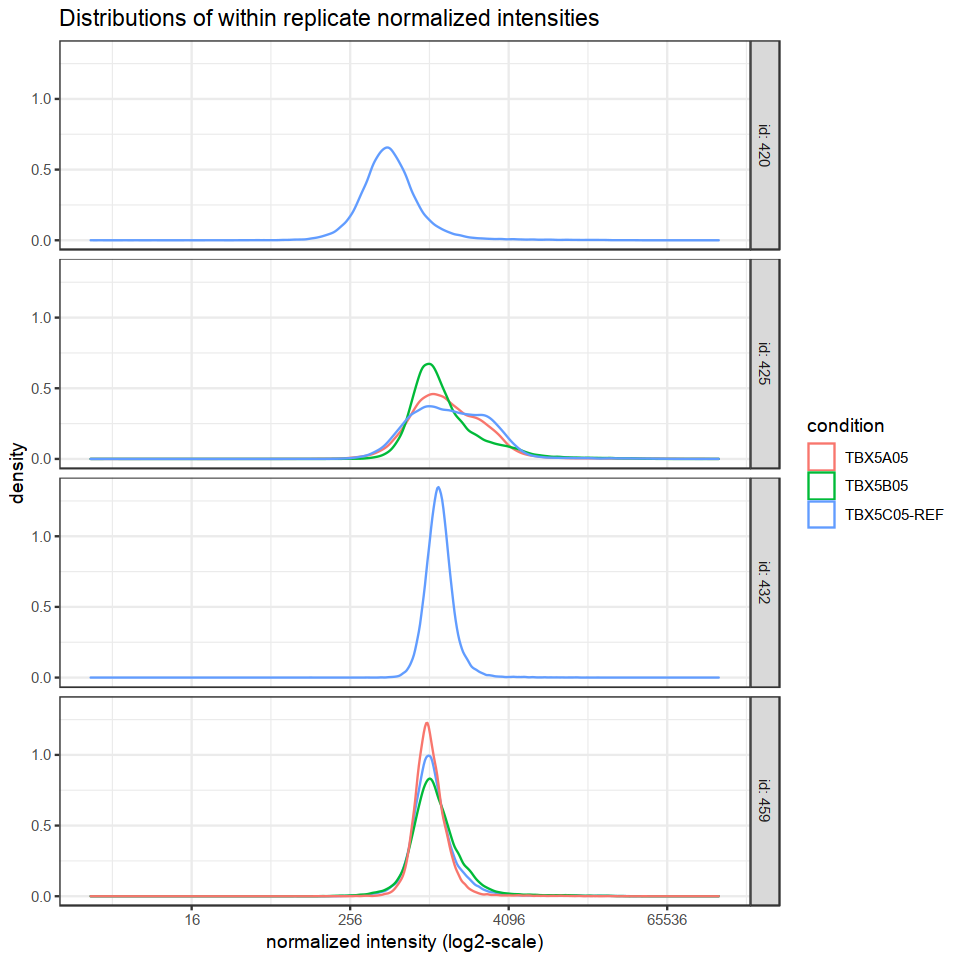

In [30]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of within replicate normalized intensities")

### normalize across replicates

In [31]:
tf_a_pmt <- normalizeAcrossReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Removed 3440 rows containing non-finite values (stat_density).”


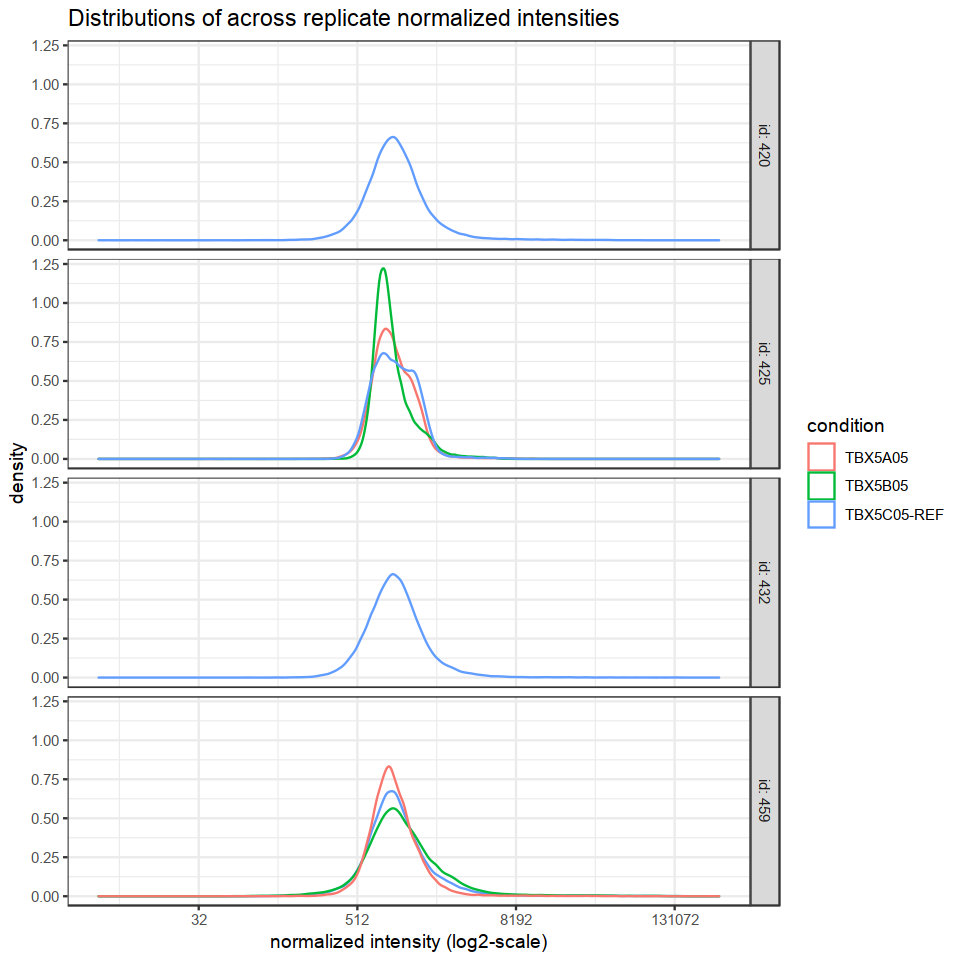

In [32]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of across replicate normalized intensities")

### write file with processed data for inference

In [33]:
tf_file <- paste0(tf, "-alexa-preprocessed.rds")
saveRDS(tf_a_pmt, file.path("../../../../data/internal/pbms/upbm_processed", tf_file))

## 8. QC: check which probes will be filtered after adjustment

upbm inference will not run if >20% of probes are filtered out

In [34]:
tf_ap_df <- broom::tidy(tf_a_pmt, long = TRUE)

In [35]:
l <- length(unique(tf_ap_df$probeID))

In [36]:
tf_ap_df %>%
    dplyr::group_by(id, condition) %>%
    dplyr::summarize(nna = sum(is.na(normalized)), percent_filtered_out = 100*nna/l) %>%
    dplyr::filter(percent_filtered_out<20) %>%
    dplyr::ungroup() %>%
    print(n = 100)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


# A tibble: 8 × 4
     id condition     nna percent_filtered_out
  <dbl> <chr>       <int>                <dbl>
1   420 TBX5C05-REF  1008              2.40   
2   425 TBX5A05        35              0.0834 
3   425 TBX5B05        31              0.0739 
4   425 TBX5C05-REF     4              0.00954
5   432 TBX5C05-REF     3              0.00715
6   459 TBX5A05       907              2.16   
7   459 TBX5B05       470              1.12   
8   459 TBX5C05-REF   982              2.34   


## 9. 8mer summarization

median among probes by default

In [37]:
tf_file <- paste0(tf, "-alexa-preprocessed8.rds")
tf_ap8 <- summarizeKmers(pe = tf_a_pmt,
                         metrics = "median")
saveRDS(tf_ap8, file.path(file.path("../../../../data/internal/pbms/upbm_processed", tf_file)))

## 10. QC: check replicate correlations once 8mers are summarized

In [38]:
tf_ap8_df <- broom::tidy(tf_ap8, long = TRUE)

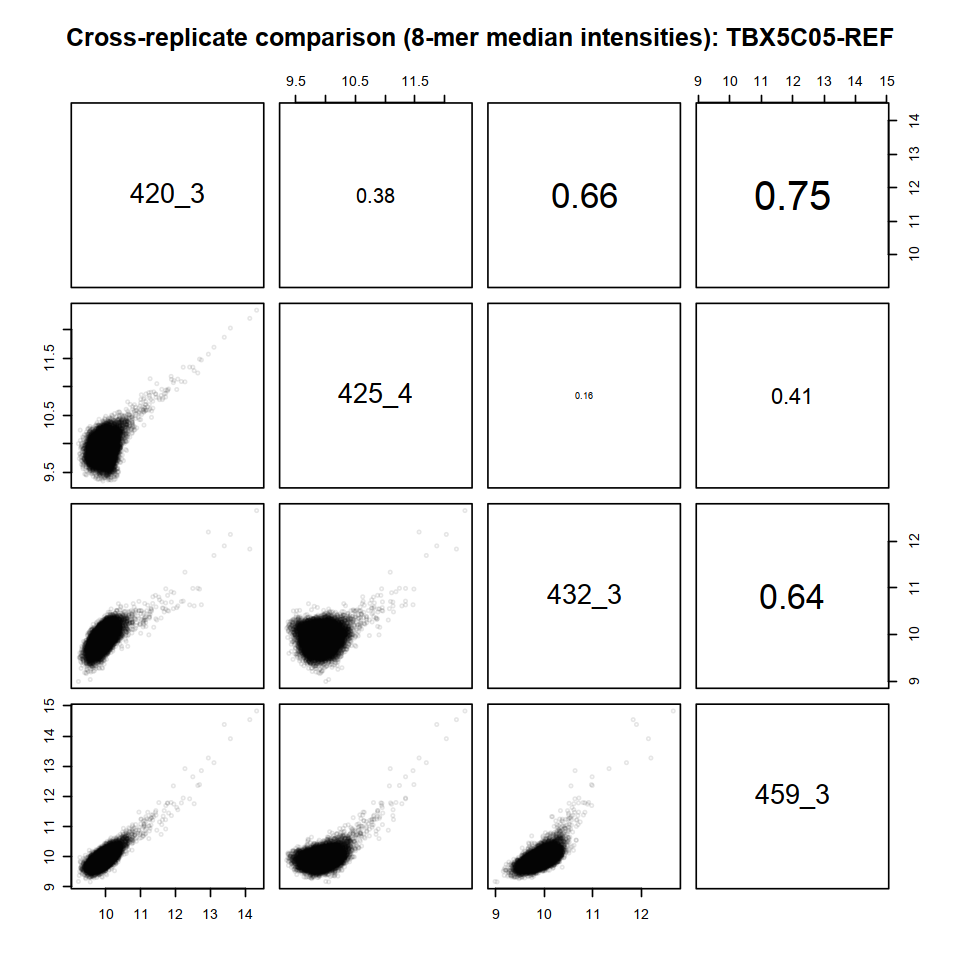

In [39]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5C05-REF") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): TBX5C05-REF")

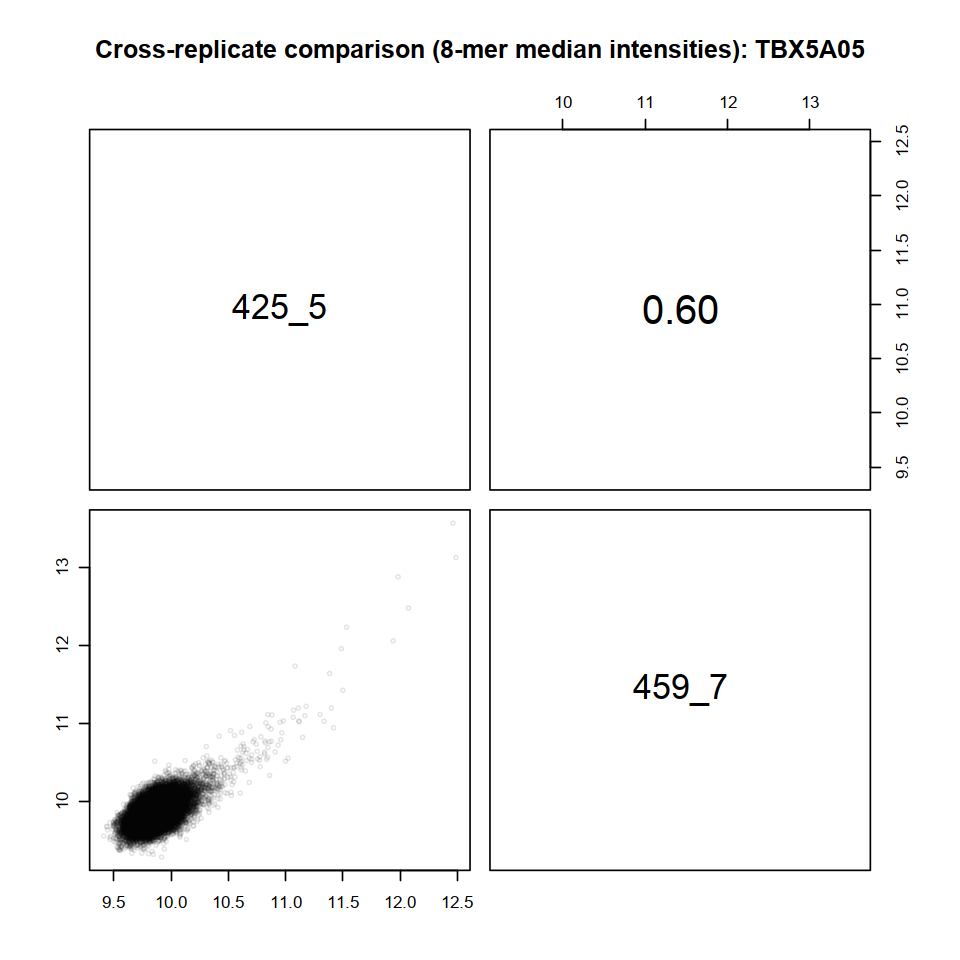

In [40]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5A05") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): TBX5A05")

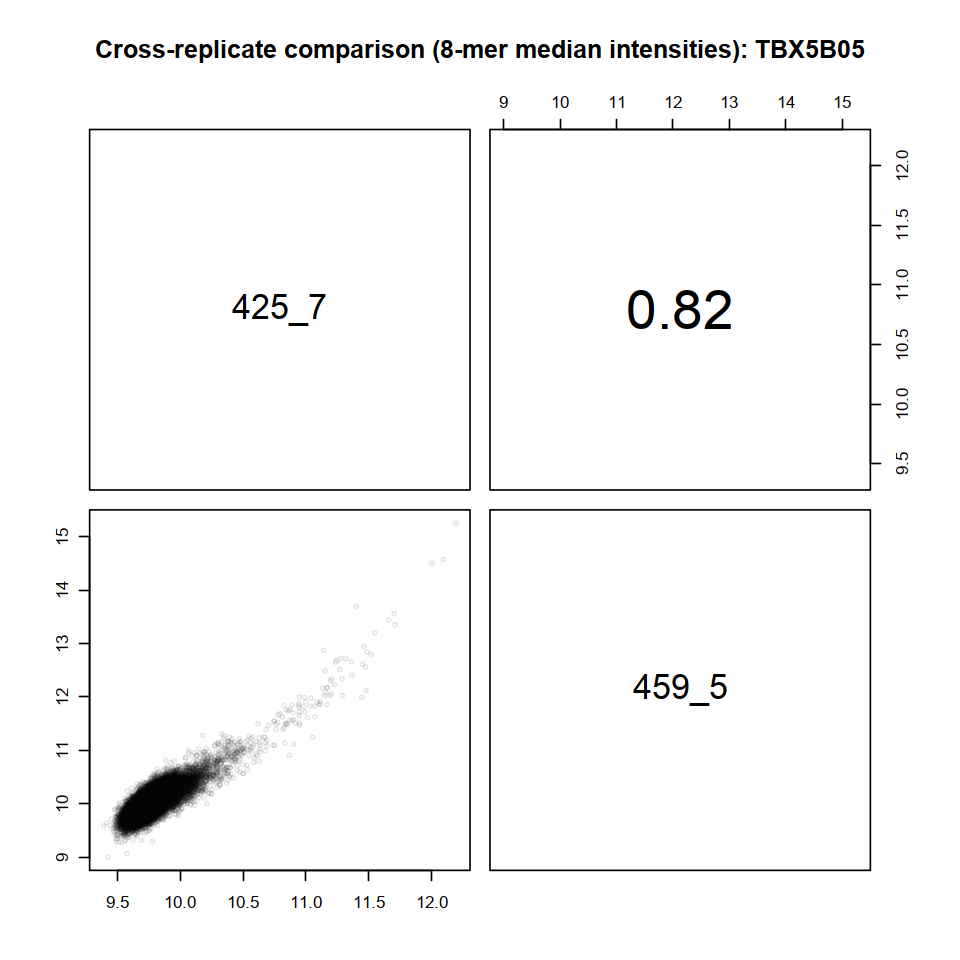

In [41]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5B05") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): TBX5B05")

## 11. QC: compare distributions of 8-mers

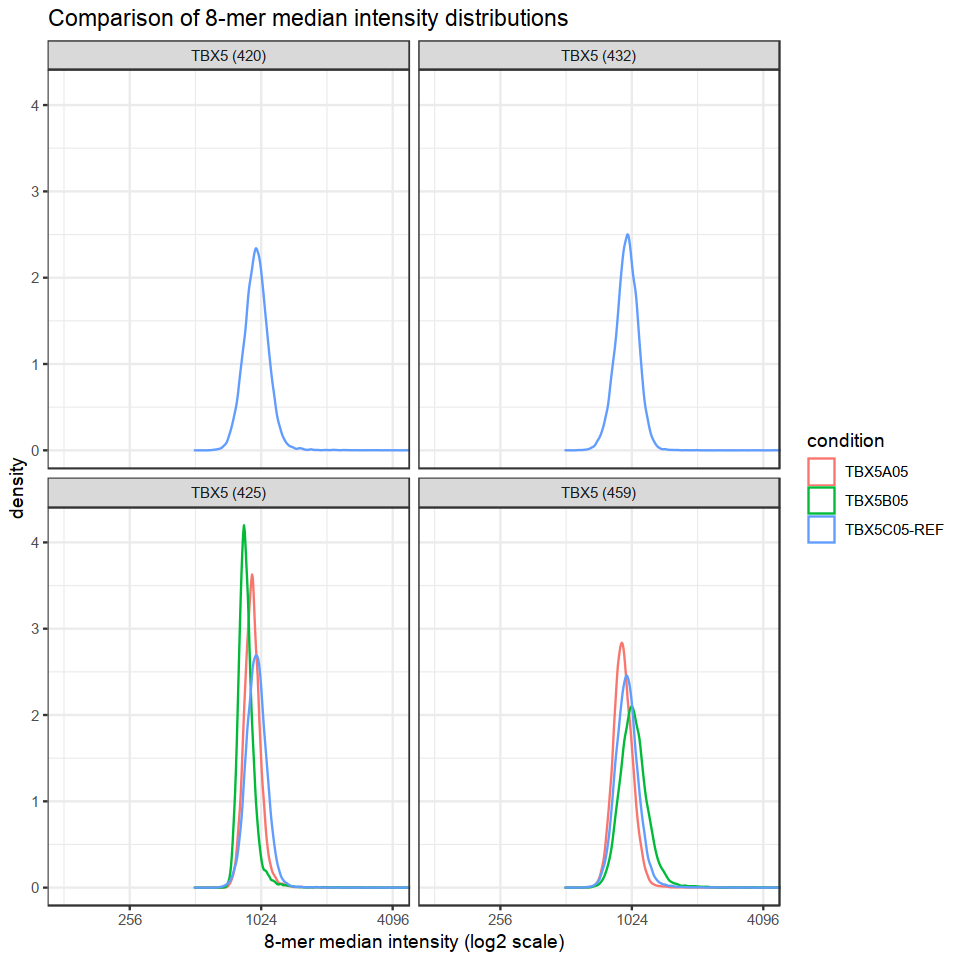

In [42]:
tf_ap8_df %>%
    dplyr::mutate(tf = paste0(tf, " (", id, ")")) %>%
    ggplot(aes(x = medianIntensity)) +
    geom_density(aes(group = condition, color = condition), alpha = 1/2) +
    facet_wrap(~ tf, nrow = 2, dir = 'v') +
    scale_fill_brewer(palette = "Set1") + 
    scale_x_continuous("8-mer median intensity (log2 scale)", trans = "log2") +
    ggtitle("Comparison of 8-mer median intensity distributions") +
    coord_cartesian(xlim = 2^c(7, 12))